In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df_daily = pd.DataFrame(
    {
        'Fund': [1.70, 1.20, 0.05], 
        'Benchmark': [1.95, 1.45, 0.05]
    },
    index=['mean', 'std', 'T-bill']
).T

df_daily['sharpe'] = (df_daily['mean'] - df_daily['T-bill']) / df_daily['std']

df_annual = pd.DataFrame(
    {
        'mean': df_daily['mean'] * 252,
        'std': df_daily['std'] * np.sqrt(252),
        'T-bill': df_daily['T-bill'] * 252,
        'sharpe': df_daily['sharpe'] * np.sqrt(252)
    }
)

df_10_day = pd.DataFrame(
    {
        'mean': df_daily['mean'] * 10,
        'std': df_daily['std'] * np.sqrt(10),
        'T-bill': df_daily['T-bill'] * 10,
        'sharpe': df_daily['sharpe'] * np.sqrt(10)
    }
)

print("Daily:")
display(df_daily)
print("10 Day:")
display(df_10_day)
print("Annual:")
display(df_annual)

Daily:


,mean,std,T-bill,sharpe
Fund,1.70,1.20,0.05,1.375000
Benchmark,1.95,1.45,0.05,1.310345


10 Day:


,mean,std,T-bill,sharpe
Fund,17.0,3.794733,0.5,4.348132
Benchmark,19.5,4.585303,0.5,4.143674


Annual:


,mean,std,T-bill,sharpe
Fund,428.4,19.049409,12.6,21.827448
Benchmark,491.4,23.018036,12.6,20.801079


### VaR
***

$$
VaR_{ht,a}=\Phi^{-1}(1-a)\sigma_{ht}+\mu_{ht}
$$

,Fund,Benchmark
95.0% VaR,-0.273824,-0.435038
99.9% VaR,-2.008279,-2.530837


,Fund,Benchmark
95.0% VaR,10.758219,11.957848
99.9% VaR,5.273393,5.330350


,Fund,Benchmark
95.0% VaR,397.06651,453.538699
99.9% VaR,369.53290,420.268920


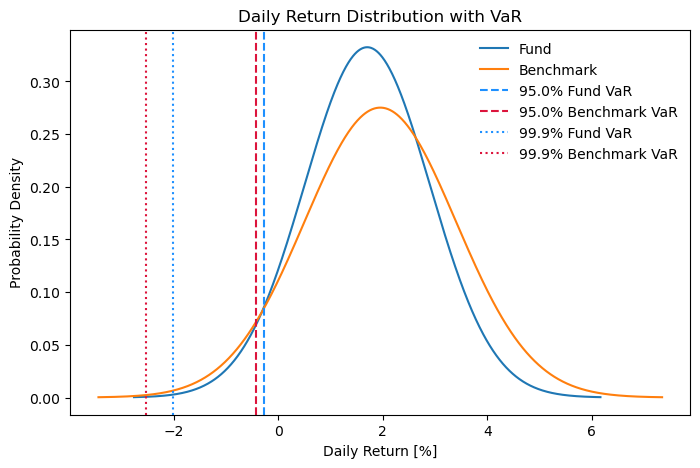

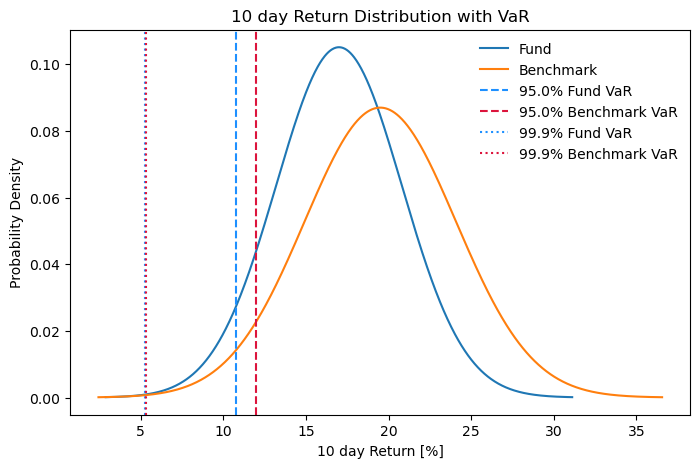

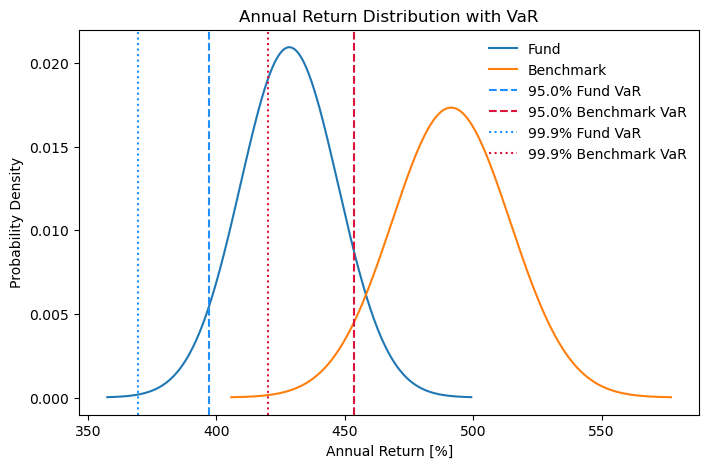

In [2]:

df_list = [df_daily, df_10_day, df_annual]

name = ['Daily', '10 day', 'Annual']

confidence = [0.95, 0.999]

linetype = ['--', ':']

colors = ['dodgerblue', 'crimson']

for i, df in enumerate(df_list):
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))

    # Plot Normal distribution
    dist = stats.norm(loc=df['mean'], scale=df['std'])
    x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 1000)
    y = dist.pdf(x)
    ax.plot(x, y, label=['Fund', 'Benchmark'])

    
    ax.set_title(f'{name[i]} Return Distribution with VaR')
    ax.set_xlabel(f'{name[i]} Return [%]')
    ax.set_ylabel('Probability Density')

    var_res = np.zeros((len(confidence), len(df.index.values)))

    for j, conf in enumerate(confidence):
        Z_score = -stats.norm.ppf(1 - conf)
        
        for k, fund_type in enumerate(df.index.values):

            var = df.loc[fund_type, 'mean'] - Z_score * df.loc[fund_type, 'std']
            ax.axvline(
                x=var, 
                color=colors[k], 
                linestyle=linetype[j], 
                linewidth=1.5, 
                label=f'{conf:.1%} {fund_type} VaR'
            )
            var_res[j, k] = var

    ax.legend(frameon=False)

    res = pd.DataFrame(
        var_res,
        columns=df.index.values,
        index=[f'{conf:.1%} VaR' for conf in confidence]
    )
    display(res)
    
    fig.savefig(f'mandatory_2_{name[i].lower()}.png', dpi=300, bbox_inches='tight')

## Marginal utility

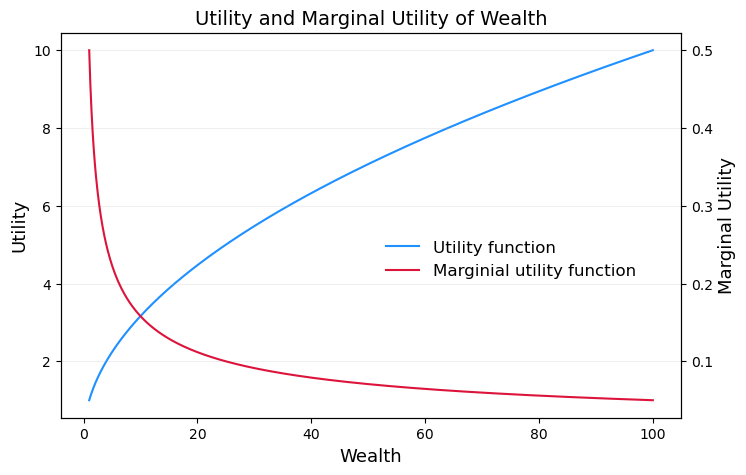

In [3]:
W = np.linspace(1, 100, 1000)

U = lambda w: w ** 0.5

dU = lambda w: 1 / (2 * w ** 0.5)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax2 = ax1.twinx()
ax1.plot(W, U(W), label='Utility function', color='dodgerblue')
ax2.plot(W, dU(W), label='Marginial utility function', color='crimson')
ax1.set_xlabel('Wealth', fontsize=13)
ax1.set_ylabel('Utility', fontsize=13)
ax2.set_ylabel('Marginal Utility', fontsize=13)
ax1.set_title('Utility and Marginal Utility of Wealth', fontsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

legend = ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.5, 0.5), frameon=False, fontsize=12)

ax2.grid(alpha=0.2)

fig.savefig('mandatory_2_utility.png', dpi=300, bbox_inches='tight')
